# Project 2:  Holiday weather

by Rob Griffiths, 11 September 2015, updated 11 April 2017

This is the project notebook for Week 2 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

Project changed by Herbert Mehlhose, 23.05.2017

City of choice: ***Moscow***
In addition, I did some analysis to compare mean temperatures between Moscow and London in a graph. See end of this project. Was a nice work to play with Pandas.

In [102]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
citydf = read_csv('Moscow_SVO_2014.csv', skipinitialspace=True)

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [103]:
citydf = citydf.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})
citydf.tail()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
360,2014-12-27,-7,-9,-13,-8,-9,-14,93,91,80,...,10,10,8,26,19,43,0,7,NaN,224<br />
361,2014-12-28,-10,-12,-15,-11,-13,-16,93,92,85,...,10,7,0,18,8,NaN,0,7,Fog-Snow,36<br />
362,2014-12-29,-12,-14,-17,-13,-17,-19,92,87,78,...,10,10,9,18,13,NaN,0,7,Snow,306<br />
363,2014-12-30,-15,-17,-18,-17,-18,-20,92,86,85,...,10,10,9,21,14,40,0,4,NaN,320<br />
364,2014-12-31,-7,-14,-22,-8,-16,-24,93,87,78,...,10,6,2,32,16,35,0,7,Snow,221<br />


remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [104]:
citydf['WindDirDegrees'] = citydf['WindDirDegrees'].str.rstrip('<br />')
citydf['WindDirDegrees'].tail()

360    224
361     36
362    306
363    320
364    221
Name: WindDirDegrees, dtype: object

and change the values in the `'WindDirDegrees'` column to `float64`:

In [105]:
citydf['WindDirDegrees'] = citydf['WindDirDegrees'].astype('float64')
citydf.dtypes

Date                           object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm              float64
Mean VisibilityKm             float64
Min VisibilitykM              float64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                float64
dtype: object

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.
NOTE: The *MOSCOW* dataset has name `Date` instead of `GMT` in its first column.

In [106]:
citydf['Date'] = to_datetime(citydf['Date'])
citydf.dtypes

Date                          datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                     float64
Mean VisibilityKm                    float64
Min VisibilitykM                     float64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                   float64
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [107]:
citydf.index = citydf['Date']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the northern hemisphere I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [108]:
summer = citydf.ix[datetime(2014,6,1) : datetime(2014,8,31)]

I now look for the days with warm temperatures.

In [109]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-30,2014-07-30,32,26,19,16,13,11,69,48,29,...,10,9,5,29,11,40,0,6,Rain,236
2014-08-02,2014-08-02,33,26,18,20,16,13,94,65,31,...,10,10,9,47,5,68,0,6,Rain-Thunderstorm,35


Moscow 2 days > 25 Celsius, while London did not show a single day in comparison. 
Next we tell Jupyter to display any graph created inside this notebook:

In [110]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

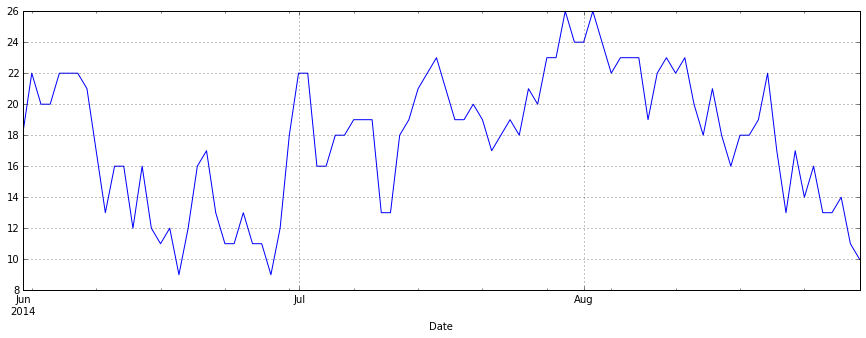

In [111]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(15,5))

Well looking at the graph the second half of July looks good for mean temperatures over 20 degrees C so let's also put precipitation on the graph too:

Precipitationmm    0
dtype: float64

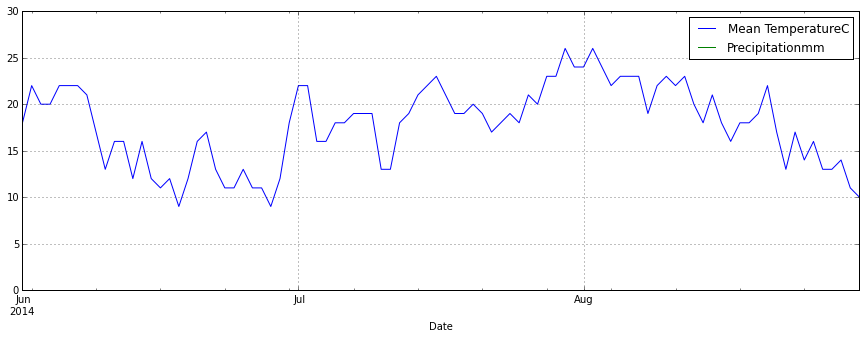

In [112]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(15,5))
summer[['Precipitationmm']].sum() # yes, it's really ZERO, no plot error


The second half of July is still looking good, with just a couple of peaks showing heavy rain. Let's have a closer look by just plotting mean temperature and precipitation for July.  

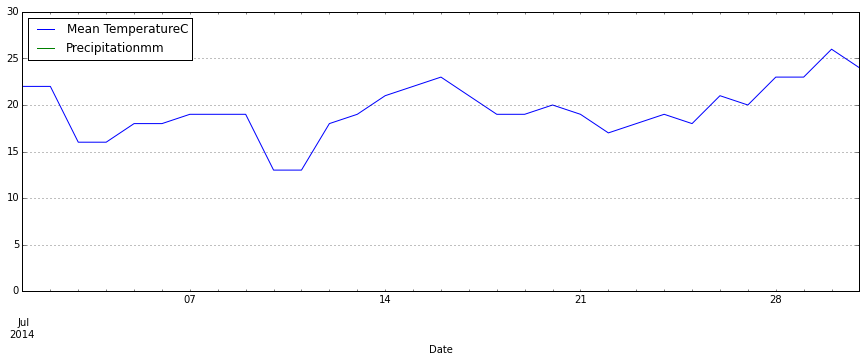

In [113]:
july = summer.ix[datetime(2014,7,1) : datetime(2014,7,31)]
july[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(15,5))

# Comparing temperatures with London
We now load the London dataset again and try to compare temperaturs against Moscow in a Graph.

In [114]:
london = read_csv('London_2014.csv')
london.dtypes

GMT                             object
Max TemperatureC                 int64
Mean TemperatureC                int64
Min TemperatureC                 int64
Dew PointC                       int64
MeanDew PointC                   int64
Min DewpointC                    int64
Max Humidity                     int64
 Mean Humidity                   int64
 Min Humidity                    int64
 Max Sea Level PressurehPa       int64
 Mean Sea Level PressurehPa      int64
 Min Sea Level PressurehPa       int64
 Max VisibilityKm                int64
 Mean VisibilityKm               int64
 Min VisibilitykM                int64
 Max Wind SpeedKm/h              int64
 Mean Wind SpeedKm/h             int64
 Max Gust SpeedKm/h            float64
Precipitationmm                float64
 CloudCover                    float64
 Events                         object
WindDirDegrees<br />            object
dtype: object

In [115]:
londonMeanTemp = london['Mean TemperatureC']
londonMeanTemp.tail()

360    3
361    2
362    1
363    1
364    2
Name: Mean TemperatureC, dtype: int64

We now add the london mean tempearature as a column to our moscow dataset. We need to use *values* to make this work.

In [116]:
citydf['meanTempCLondon'] = londonMeanTemp.values
citydf.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,meanTempCLondon
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,1,-1,-2,-2,-3,-5,87,81,75,...,10,10,21,14,NaN,0,8,NaN,227,8
2014-01-02,2014-01-02,-2,-3,-5,-4,-5,-6,93,87,80,...,10,10,18,13,NaN,0,8,NaN,200,9
2014-01-03,2014-01-03,-1,-3,-4,-2,-4,-6,100,89,80,...,7,3,21,11,32,0,8,Snow,134,8
2014-01-04,2014-01-04,-1,-2,-2,-3,-4,-5,93,85,80,...,6,3,18,13,32,0,8,Snow,157,6
2014-01-05,2014-01-05,1,0,-1,1,-1,-3,100,93,81,...,6,1,26,16,NaN,0,8,Snow,195,7


In the next step, we can visualize the information

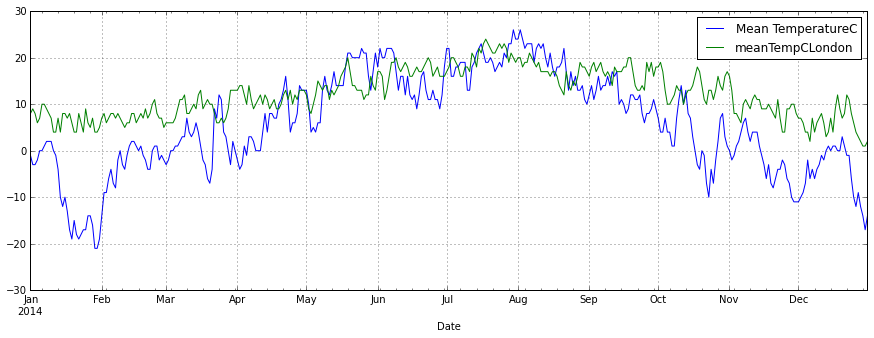

In [117]:
citydf[['Mean TemperatureC', 'meanTempCLondon']].plot(grid=True, figsize=(15,5))


Note, that the legend could be done nicer... TODO

## Conclusions

Well, it shows, that the temperatures in Moscow are similar to those in London during summer, and the differences only are in winter - very rough view :)